importing libreries 

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,Flatten,RandomFlip,RandomRotation
from sklearn.metrics import confusion_matrix
import seaborn as sns 
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

loading image dataset

In [2]:
train_path = 'C:/Users/Jyoti Pawar/pandas_study/cnn_project/melanoma_cancer_dataset/train'
test_path="C:/Users/Jyoti Pawar/pandas_study/cnn_project/melanoma_cancer_dataset/test"

In [3]:
dataset=keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
)

Found 9605 files belonging to 2 classes.


In [4]:
test=keras.utils.image_dataset_from_directory(
    directory=test_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    shuffle=True
)

Found 1000 files belonging to 2 classes.


Splitting dataset

In [5]:
Dataset_size=len(dataset)
train_ratio =0.8
train=dataset.take(int(Dataset_size*train_ratio))
val=dataset.skip(int(Dataset_size*train_ratio))

Data visulization

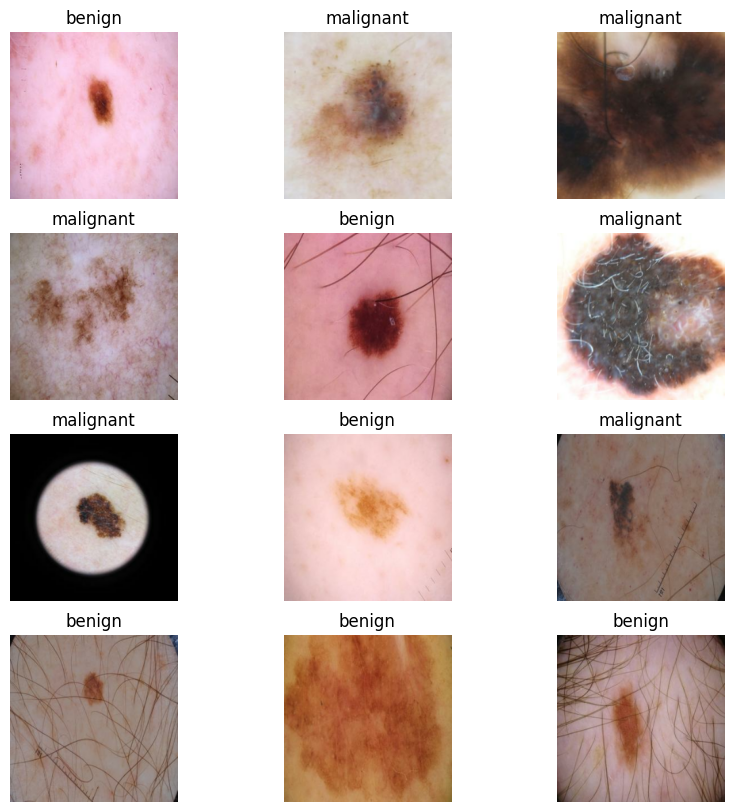

In [6]:
class_name=dataset.class_names
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

Building model

In [7]:
Augmentation=Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2)
])

In [8]:
def Normalizer(image, label):
    image= tf.cast(image/255., tf.float32)
    return image, label
train, val, test = train.map(Normalizer), val.map(Normalizer), test.map(Normalizer)

In [9]:
model = Sequential([
    Augmentation,
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=64, activation="relu"),
    Dense(units=2, activation="softmax"),
])

model.build (input_shape=(None, 256, 256, 3))

model.summary()
    

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,522 (216.88 KB)

 Trainable params: 55,522 (216.88 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer= 'adam',
    loss=  'sparse_categorical_crossentropy',
    metrics = ['accuracy',]
)

In [11]:
early_stopping = EarlyStopping(
    monitor = 'accuracy',
    patience = 3,
    restore_best_weights = True,
)

Training model

In [12]:
epoch=25

In [13]:
history = model.fit(train,batch_size=32, epochs=epoch, verbose=1, validation_data=val, callbacks=[early_stopping])

Epoch 1/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 147s 592ms/step - accuracy: 0.6811 - loss: 0.5607 - val_accuracy: 0.8270 - val_loss: 0.3797
Epoch 2/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 520ms/step - accuracy: 0.8441 - loss: 0.3632 - val_accuracy: 0.8582 - val_loss: 0.3273
Epoch 3/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 511ms/step - accuracy: 0.8578 - loss: 0.3264 - val_accuracy: 0.8452 - val_loss: 0.3297
Epoch 4/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 124s 517ms/step - accuracy: 0.8608 - loss: 0.3190 - val_accuracy: 0.8665 - val_loss: 0.2952
Epoch 5/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 512ms/step - accuracy: 0.8685 - loss: 0.3011 - val_accuracy: 0.8660 - val_loss: 0.3019
Epoch 6/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 126s 525ms/step - accuracy: 0.8733 - loss: 0.2939 - val_accuracy: 0.8660 - val_loss: 0.2981
Epoch 7/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 125s 520ms/step - accuracy: 0.8711 - loss: 0.2993 - val_accuracy: 0.8800 - val_loss: 0.2771
Epoch 8/25
240/240 ━━━━━━━━━━━━━━━━━━━━ 123s 513ms/step - accuracy: 0.8728 -

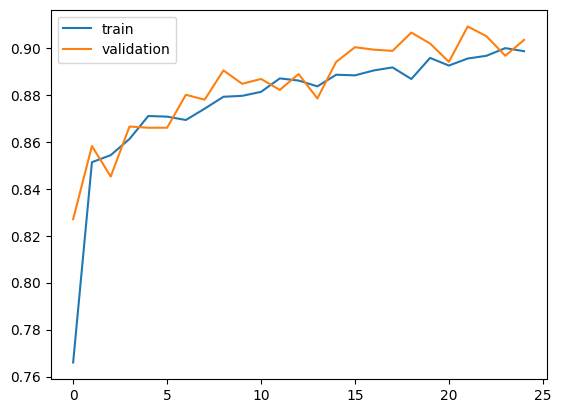

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'])

In [18]:
model.save('model.keras')

confusion matrix and model Evalution

In [21]:
true, predicted = [], []
for images, labels in test:
    for img, label in zip(images, labels):
        true.append(label.numpy())
        pred = model.predict(tf.expand_dims(img, axis=0))
        predicted.append(np.argmax(pred[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━

<Axes: >

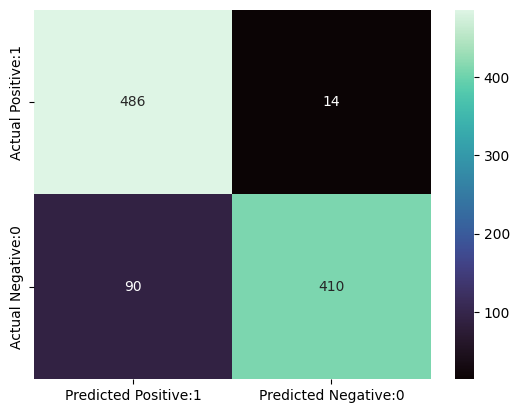

In [22]:
cm = confusion_matrix(true, predicted)
cm_matrix = pd.DataFrame(data=cm, columns=['Predicted Positive:1', 'Predicted Negative:0'], index=['Actual Positive:1', 'Actual Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt = 'd', cmap='mako')